In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json("logins.json")
df.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [3]:
print(df.describe)

<bound method NDFrame.describe of                login_time
0     1970-01-01 20:13:18
1     1970-01-01 20:16:10
2     1970-01-01 20:16:37
3     1970-01-01 20:16:36
4     1970-01-01 20:26:21
...                   ...
93137 1970-04-13 18:50:19
93138 1970-04-13 18:43:56
93139 1970-04-13 18:54:02
93140 1970-04-13 18:57:38
93141 1970-04-13 18:54:23

[93142 rows x 1 columns]>


In [4]:
print(df.columns)

Index(['login_time'], dtype='object')


In [5]:
print(df.shape)

(93142, 1)


In [6]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [7]:
df['count']=1

In [8]:
df.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [9]:
df.set_index('login_time', inplace=True)

In [10]:
df_agg=df.resample('15min').sum()

In [11]:
df_agg.head(10)

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


In [12]:
print(df_agg.shape)

(9788, 1)


In [20]:
print(df_agg['count'].shape)

(9788,)


### visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand

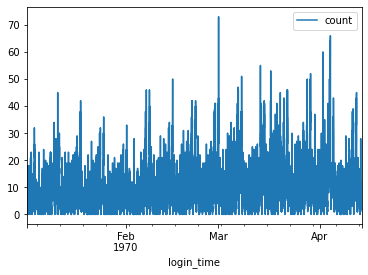

In [21]:
df_agg.plot()
plt.show()

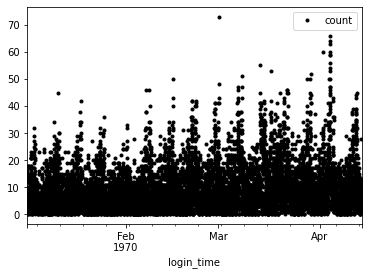

In [27]:


df_agg.plot(style='k.')
plt.show()

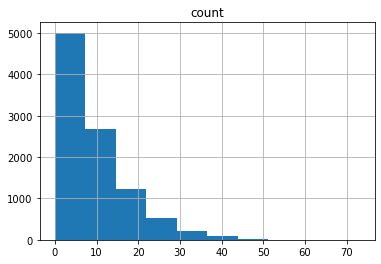

In [30]:
df_agg.hist()
plt.show()

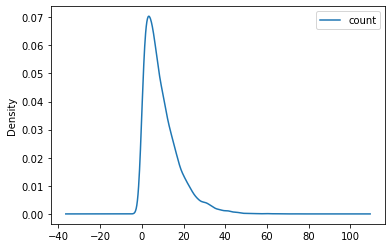

In [31]:
df_agg.plot(kind='kde')
plt.show()

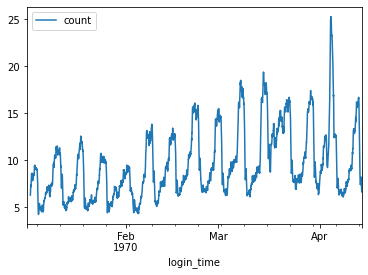

In [33]:
df_agg.rolling(window=100).mean().plot()
plt.show()

### Let's plot demand just for the month of March to see if we can get more granular insights:

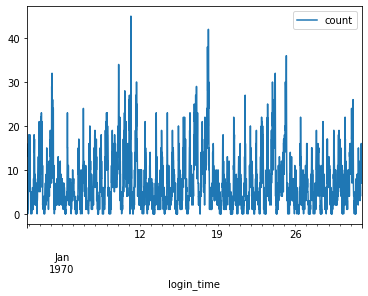

In [38]:
## checking for march month
df_jan=df_agg.loc['1970-01']
df_jan.plot()
plt.show()

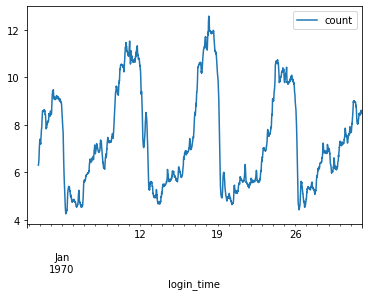

In [40]:
df_jan.rolling(window=100).mean().plot()
plt.show()

### there is spike can been seen ater a week each time

## checking for the spike with dated from 1970 calander

In [56]:

date = pd.DataFrame({'inputDate':list(pd.date_range('1970-01-01',
                                                       '1970-02-01', 
                                                       freq ='D').to_series())})
date['inputDate'] = pd.to_datetime(date['inputDate'])
date['dayOfWeek'] = date['inputDate'].dt.day_name()

In [59]:
date.head(32)

,inputDate,dayOfWeek
0,1970-01-01,Thursday
1,1970-01-02,Friday
2,1970-01-03,Saturday
3,1970-01-04,Sunday
4,1970-01-05,Monday
5,1970-01-06,Tuesday
6,1970-01-07,Wednesday
7,1970-01-08,Thursday
8,1970-01-09,Friday
9,1970-01-10,Saturday


##### It comes out that the weeekend has spike cout of login

### Exploring the data with respect to login times

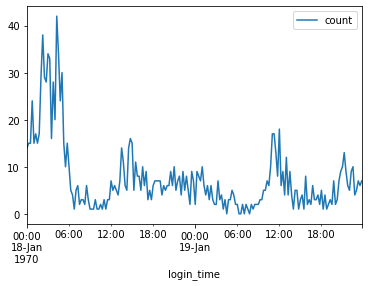

In [65]:
## ploting the graph in on weekend

df_agg.loc['1970-01-18':'1970-01-19'].plot()
plt.show()

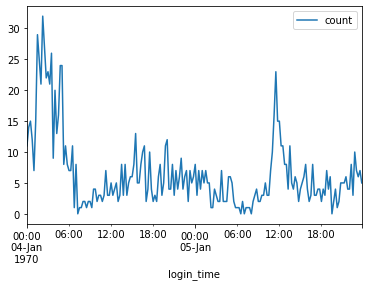

In [67]:
df_agg.loc['1970-01-04':'1970-01-05'].plot()
plt.show()

#### we can conclude that there there were more login at midinight of the weekend